### Problem Statement:

### Data Set Information:

#### This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

In [86]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score



In [2]:
# READING THE DATASET
df=pd.read_csv("mushroom.csv")

df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


There are two type of Myshrooms, one is Poisonous and other is Edible. Poisonous is written as 'p' and edible is written as 'e'. So it is a Classification type of a problem,where by analyzing different charactestics like cap-shape,cap-surface, cap-color,bruises,odor,gill-attachment,gill-spacing,gill-colour,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat we can predict whether the mushroom is edible or poisonous.

In [3]:
df.shape

(8124, 23)

This dataset has 8124 rows and 23 columns.

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

column 'class' is the label of the dataset And rest of the columns are the features. All of the features are containing categorical data only (dtype: Object).

In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no NaN values or missing data present in the dataset.

We need to encode all the categorical data into ordinal values. For that we can use LabelEncoder.

In [6]:
# WE need to Encode each of the columns:

df = df.apply(LabelEncoder().fit_transform)
df.head(50)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


'p'(poisonous) class is encoded as 1, 'e'(edible) class is encoded as 0. And all the feature data are encoded in ordinal values depending on each type. like cap-shape has 5 types of ordinal values.

In [7]:
# Checking the statistics of the dataset:

df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


After checking the encoded and stats value of the dataset , got to no that "veil-type" is not contributing. So need to drop that one feature.

In [8]:
#Checking the values of 'veil-type' closely.
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [9]:
#DROP ALERT: there is no values in 'veil-type',so we can delete that.
df = df.drop(['veil-type'],axis=1)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


## Data Analysis:

In [10]:
# Checking the Lable column to understand the dataset is balanced or not.

df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

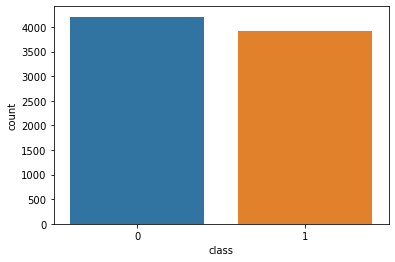

In [11]:
# Plotting each class frequency:

sns.countplot(df['class'])

The dataset is not Imbalanced as the diffrence of the Edible and Poisonous Mushroom is very less. 4208 Edible Mushroom and 3916 Poisonous mushroom.
Blue represents the Edible mushroom.
Yellow represents the Poisonous mushroom.

In [12]:
#Dividing Dataset into Features and Label:

y=df['class']
x=df.drop(columns=['class'])

In [13]:
#Checking the feature data:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


Now the x variable has the feature data and the y variable has the label data. 
Now we can check the relationship between the features with label.

# Visualization the relationship between Features and Class:

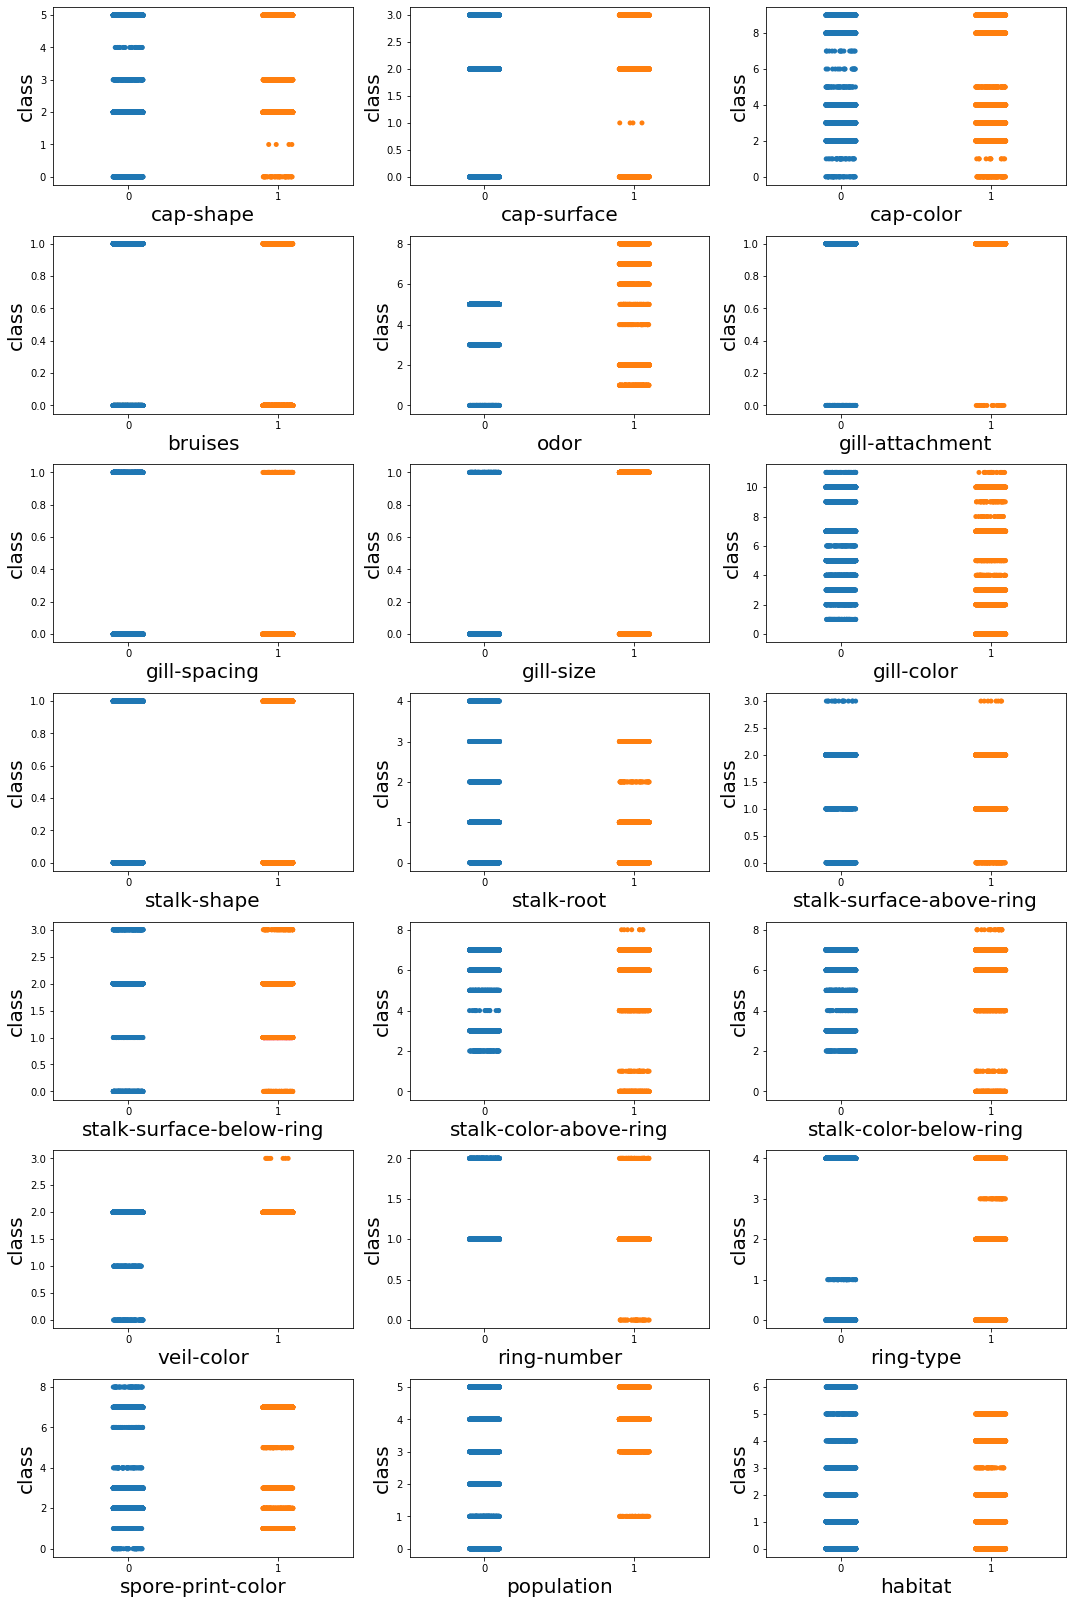

In [14]:
# lets see how features are related to class:

plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=24:
        ax=plt.subplot(8,3,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('class',fontsize=20)
    plotnumber+=1
plt.tight_layout()  

By using this visualization technique we got to know that all the features have relation with the label(class). And the relation of 'odor' with 'class' respect to the mushroom is edible or poisonous is visible. May be some poisonous mushrooms have distinct odor and by that we can identify that, that perticular mushrooms should not be eaten. distinct stalk colour above ring ,stalk colour below ring,gill colour also maybe helpful to identify poisonous mushrooms.

Now let's check the correlation between features.

In [15]:
corr=df.corr()
corr.shape

(22, 22)

#### Visualization: (Heat map)

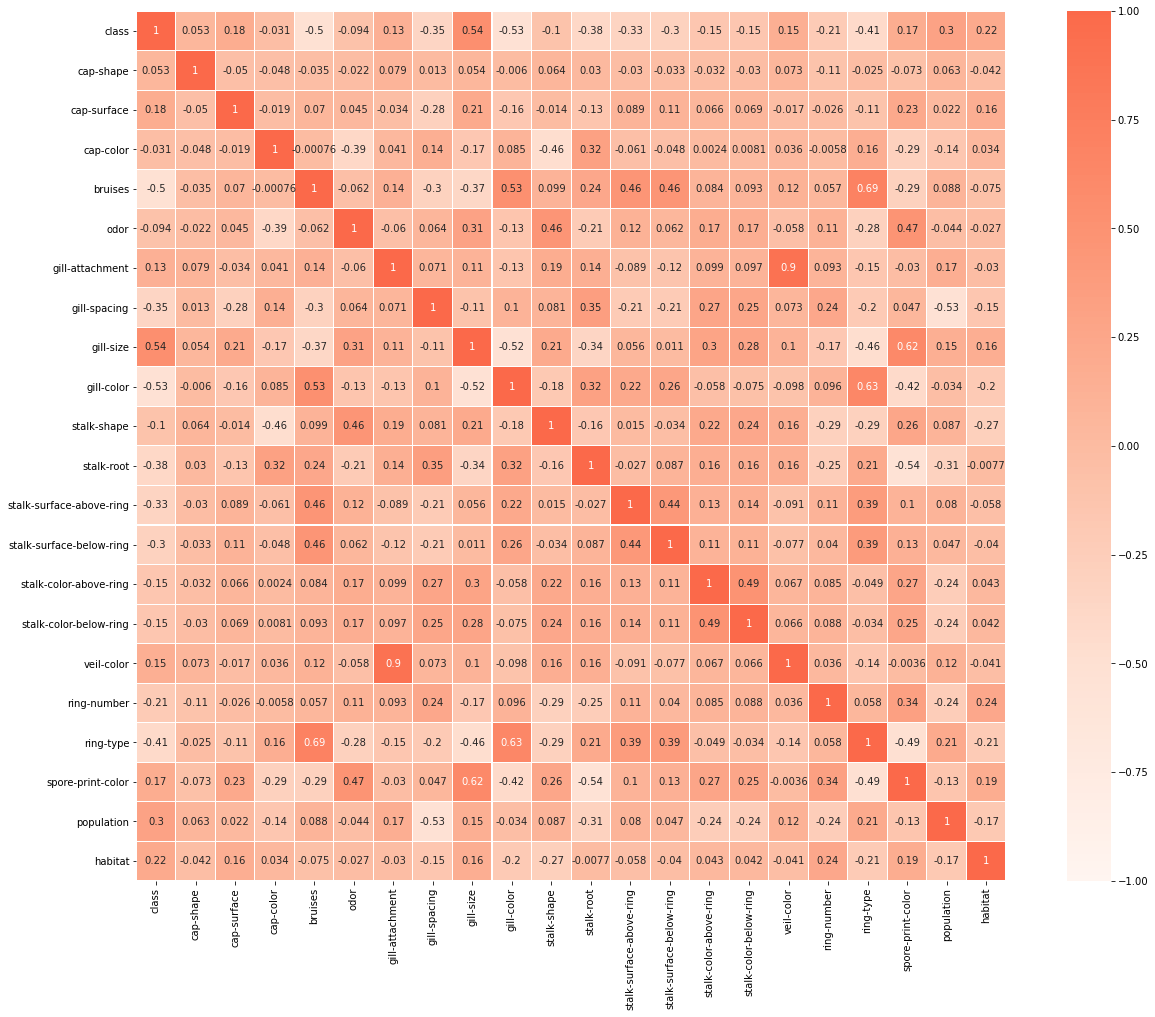

In [16]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(22,16))
sns.heatmap(corr,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

Least correlation between features important for Classification. As we expected 'odor' is very less correlated(-0.094).In this dataset most of the variables are not correlated. So, there is no multilinearity in the dataset.

In [17]:
#Before Model selection its time to Standadize the feature data:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

Now all the feature data are standardized. By doing Standardization all the variables are in same scale and by that my model understand that all the data is equally important.

Now it's time to split the data into train and test(75/25 training and test split). Our model will be build on training data and tested on test data.

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

### Model Creation:
Now let's see the Accuracy scores according to five models we have used below. we are using models like,
1. Logistic Regression,
2. Decision Tree Classifier,
3. Random Forest Classifier,
4. K-Nearest Neighbors Classifier,
5. Support Vector Classifier(SVC).

#### 1. Logistic Regression:

In [19]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")
      


=======================Train Result===========================
Accuracy score:95.57%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.955088     0.956342  0.955687     0.955715      0.955690
recall        0.959912     0.951111  0.955687     0.955511      0.955687
f1-score      0.957494     0.953720  0.955687     0.955607      0.955682
support    3168.000000  2925.000000  0.955687  6093.000000   6093.000000
________________________________________________________________
 Confusion Matrix:
[[3041  127]
 [ 143 2782]]



In [44]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print("\n=======================Test Result of LR ===========================")
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")      
      


=======================Test Result of LR ===========================
Accuracy score:95.52%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.962927    0.947316  0.955194     0.955121      0.955310
recall        0.949038    0.961655  0.955194     0.955347      0.955194
f1-score      0.955932    0.954432  0.955194     0.955182      0.955200
support    1040.000000  991.000000  0.955194  2031.000000   2031.000000
________________________________________________________________
 Confusion Matrix:
[[987  53]
 [ 38 953]]



Let's plot the Confusion matrix of Logistic Regression for Visualization:

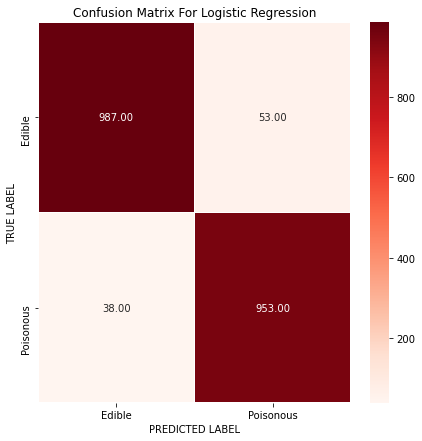

In [47]:
cm = confusion_matrix(y_test,lr_pred)

x_axis_labels=['Edible','Poisonous']
y_axis_labels=['Edible','Poisonous']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Logistic Regression')

plt.show()

In [48]:
#checking ROC_AUC Score of Logistic Regression:

roc_auc_score(y_test,lr.predict(x_test))

0.9553466777924395

#### 2. Decision Tree Classifier :

In [49]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3168.0  2925.0       1.0     6093.0        6093.0
________________________________________________________________
 Confusion Matrix:
[[3168    0]
 [   0 2925]]



In [50]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print("\n=======================Test Result of dt_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")      
      


=======================Test Result of dt_clf===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1040.0  991.0       1.0     2031.0        2031.0
________________________________________________________________
 Confusion Matrix:
[[1040    0]
 [   0  991]]



Let's plot the Confusion matrix of Decision Tree Classifier for Visualization:

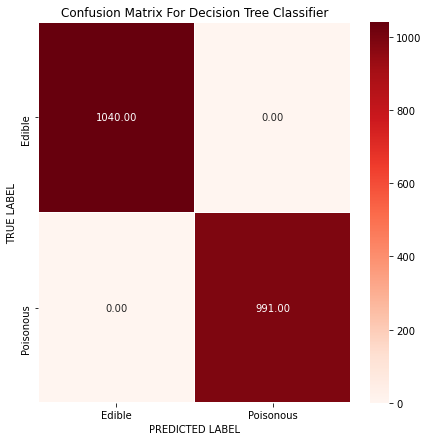

In [51]:
cm = confusion_matrix(y_test,dt_pred)

x_axis_labels=['Edible','Poisonous']
y_axis_labels=['Edible','Poisonous']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Decision Tree Classifier')

plt.show()

In [52]:
#ROC_AUC Score of Decision Tree Classifier:
roc_auc_score(y_test,dt.predict(x_test))

1.0

#### 3. Random Forest Classifier :

In [53]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3168.0  2925.0       1.0     6093.0        6093.0
________________________________________________________________
 Confusion Matrix:
[[3168    0]
 [   0 2925]]



In [54]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print("\n=======================Test Result of RF_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")      
      


=======================Test Result of RF_clf===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1040.0  991.0       1.0     2031.0        2031.0
________________________________________________________________
 Confusion Matrix:
[[1040    0]
 [   0  991]]



Let's plot the Confusion matrix of Random Forest Classifier for Visualization:

Text(0.5, 1.0, 'Confusion Matrix For Random Forest Classifier')

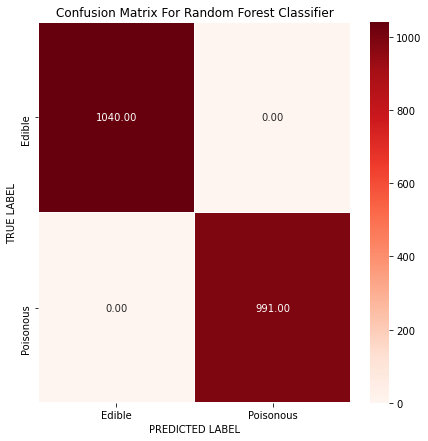

In [55]:
cm = confusion_matrix(y_test,rf_pred)

x_axis_labels=['Edible','Poisonous']
y_axis_labels=['Edible','Poisonous']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For Random Forest Classifier')

In [56]:
#ROC_AOC Score of Random Forest Classifier:

roc_auc_score(y_test,rf.predict(x_test))

1.0

#### 4. K-Neighbors Classifier :

In [57]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3168.0  2925.0       1.0     6093.0        6093.0
________________________________________________________________
 Confusion Matrix:
[[3168    0]
 [   0 2925]]



In [58]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print("\n=======================Test Result of KNN_clf===========================")
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")      
      


=======================Test Result of KNN_clf===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1040.0  991.0       1.0     2031.0        2031.0
________________________________________________________________
 Confusion Matrix:
[[1040    0]
 [   0  991]]



Let's plot the Confusion matrix of K-Nearest Neighbors for Visualization:

Text(0.5, 1.0, 'Confusion Matrix For K-Nearest Neighbor Classifier')

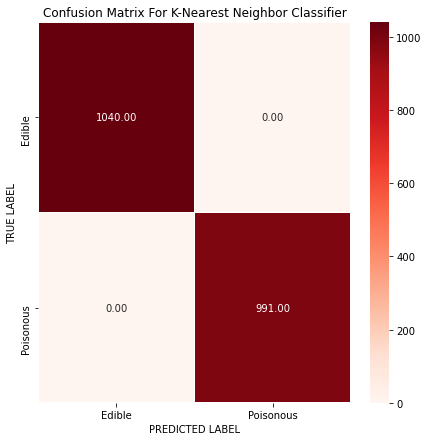

In [59]:
cm = confusion_matrix(y_test,kn_pred)

x_axis_labels=['Edible','Poisonous']
y_axis_labels=['Edible','Poisonous']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix For K-Nearest Neighbor Classifier')

In [60]:
#ROC_AUC Score of K-Nearest Kneibors Classifier:

roc_auc_score(y_test,kn.predict(x_test))

1.0

#### 5. Support Vector Classifier:

In [61]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print("\n=======================Train Result===========================")
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")
      


=======================Train Result===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.962927    0.947316  0.955194     0.955121      0.955310
recall        0.949038    0.961655  0.955194     0.955347      0.955194
f1-score      0.955932    0.954432  0.955194     0.955182      0.955200
support    1040.000000  991.000000  0.955194  2031.000000   2031.000000
________________________________________________________________
 Confusion Matrix:
[[3168    0]
 [   0 2925]]



In [62]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print("\n=======================Test Result of SVC===========================")
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print("_______________________________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("________________________________________________________________")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")      
      


=======================Test Result of SVC===========================
Accuracy score:100.00%
_______________________________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1040.0  991.0       1.0     2031.0        2031.0
________________________________________________________________
 Confusion Matrix:
[[1040    0]
 [   0  991]]



Let's plot the Confusion matrix of SVC for Visualization:

Text(0.5, 1.0, 'Confusion Matrix Of SVC')

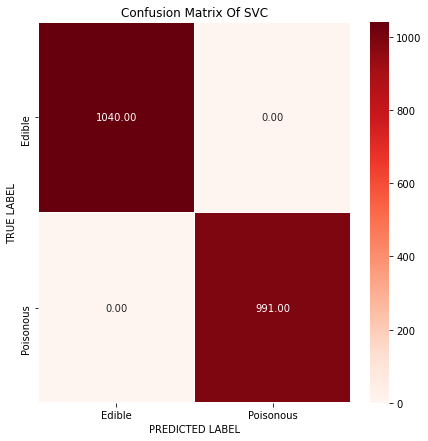

In [63]:
cm = confusion_matrix(y_test,svc_pred)

x_axis_labels=['Edible','Poisonous']
y_axis_labels=['Edible','Poisonous']

ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Reds',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.title('Confusion Matrix Of SVC')

In [64]:
#ROC_AUC Score of SVC:
roc_auc_score(y_test,svc.predict(x_test))

1.0

To get the best model we will check the ROC_AUC Curve: 

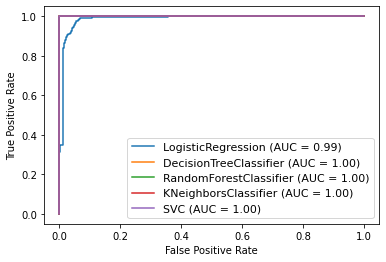

In [65]:
# Let's check ROC_AUC curve for fitted models:

disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

It seems that most models' ROC_AUC Scores are same. So to obtain the best model , Cross validation is needed.

### Cross validation :
Cross validation is widely used technique to evaluate the performance of Machine Learning Models. Cross Validation divides the data into parts, where one set is used for traning and other is used for testing purpose. And by applying CV, we can understand if our model is overfitting on training data or not.

In [69]:
#Checking Cross Validation score for Logistic Regression:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:83.92%


In [70]:
#Checking Cross Validation score of Decision Tree Classifier:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:96.65%


In [71]:
#Checking Cross Validation
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:89.46%


In [72]:
# Checking Cross Validation Score of KNN:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:88.16%


In [73]:
#Checking Cross Validation Score of SVC:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:84.20%


#### Now let's check the difference between Acuuracy Score and Cross Validation Score to select the best model from the 5 models:

Diffrence betwwwn Accuracy score and Cross Validation Score of 5 different models :
LR = 95.57-83.92 = 11.65
DT = 100.00-90.64 = 9.36
Rf = 100.00-90.33 = 9.67
KNN = 100.00-88.16 = 11.84
SVC = 100.00-84.20 = 15.8

So, as the difference of Accuracy Score and CV of Decision Tree Classifier is least, it's the best Model. 
Let's do Hyperparameter Tuning of DT.

## Hyperparameter Tuning:

Now we will use Grid Search Technique to tune the hyperparameter of Decision Tree Classifier model. After getting the best parameters we can put those into the model to obtain best accuracy.


In [74]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(3,12,2),
    'min_samples_leaf':range(3,10,2),
    'min_samples_split':range(4,10,2),
}

In [75]:
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [76]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [77]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 4}


##### We are using Pipeline method to run the model to automate machine learning workflow

In [87]:
pipe = Pipeline([('scaler',StandardScaler()),  #fit_transform
              ('DT',DecisionTreeClassifier(criterion = 'gini', 
                                           max_depth= 7, min_samples_leaf= 3, min_samples_split= 4))])#only fit

In [88]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('DT',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=3,
                                        min_samples_split=4))])

In [89]:
dt_y_pred=pipe.predict(x_test)

In [90]:
accuracy_score(y_test,dt_y_pred)

1.0

#### So, after hyperparameter tuning the Accuracy Score of Decision Tree Classifier is 100% Where as Cross Validation Score is less (90.64%). So we can say that after parameter tuning Decision Tree Model is giving the best result.

So, it's time to do model prediction using Decision Tree Classifier.

In [91]:
# model prediction using DT
x_predict = list(dt.predict(x_test))
dt_mushroom = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(dt_mushroom))

      predicted_values  orignal_values
1971                 0               0
6654                 1               1
5606                 1               1
3332                 0               0
6988                 1               1
...                ...             ...
1966                 0               0
5103                 1               1
51                   0               0
7724                 0               0
6211                 1               1

[2031 rows x 2 columns]


In [92]:
#import joblib
import joblib

joblib.dump(dt,'dt_mushroom_file.obj')

# SAVING THE MODEL 

['dt_mushroom_file.obj']

In [93]:
dt_from_joblib=joblib.load('dt_mushroom_file.obj')
dt_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([0, 1, 1, ..., 0, 0, 1])

## Conclusion:

It is a phenomenal power of machine learning where we can use those above explained models to understand if the mushroom is edible or not(Classification). At the beginning all the columns of the dataset were consist of categorical data so had to encode those columns with 'LabelEncoder'. The dataset was balanced and there is no missing values present in it from the beginning. And as all the columns are having ordinal values(categorical) there was no outlier in the dataset. Five machine learning algorithms are used to determine the accuracy, where as Decision Tree Classifier has given the best accuracy above all. As Mushroom consuption is related, we should avoid any kind of error.